In [53]:
# load necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy.stats import norm

In [44]:
# load fits cube file and image data
cube_file = r'C:/Users/Linh/Downloads/millar blanchaer group/cred2 er characterization/data/bias data/-40.0C_0.00022_400.fits'
cube_data = fits.getdata(cube_file)
# check dimensions
print(cube_data.shape) # 50 640x512 images

(50, 512, 640)


(550.0, 1850.0)

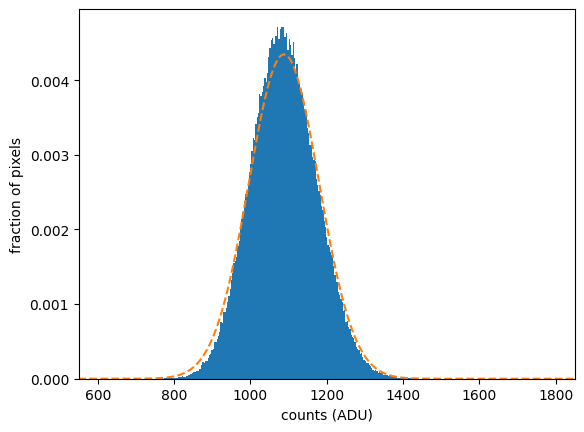

In [59]:
# average the 50 images and plot histogram of pixel values
avg_image = np.mean(cube_data, axis=0)
avg_image_hist = plt.hist(avg_image.flatten(), bins='auto', density=True)
# plot gaussian distribution b/c pixel values are near-gaussian
x = np.linspace(np.min(avg_image),np.max(avg_image),100000)
plt.plot(x, norm.pdf(x, np.mean(avg_image), np.std(avg_image)), '--', label='Gaussian PDF')
# labels and stuff
plt.xlabel('counts (ADU)')
plt.ylabel('fraction of pixels')
plt.xlim(550,1850)

In [48]:
print('Min:', np.min(avg_image))
print('Max:', np.max(avg_image))
print('Mean:', np.mean(avg_image))
print('Stdev:', np.std(avg_image))

Min: 0.0
Max: 16380.0
Mean: 1087.7567999267578
Stdev: 91.82299853116409
